<a href="https://colab.research.google.com/github/NayanaMarques/ANN_2021/blob/master/Trabalho%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#Projeto 2: Redes Neurais - Professor Ubirajara Filho
#Nayana G. Marques Silva

#Definição de bibliotecas

from matplotlib import pyplot as plt #plotar as imagens
import pandas as pd #biblioteca para manipulação de arquivos
import os
import cv2 #biblioteca para processamento de imagem
import random #biblioteca para gerar numeros aleatorios
import numpy as np #biblioteca numérica Phyton
import zipfile #biblioteca para manipular ZIP

from sklearn.svm import SVC #biblioteca de Support Vector Machine para ajuste e seleção de modelos
from sklearn import preprocessing #biblioteca para normalizar dados
from sklearn.model_selection import train_test_split #biblioteca para separar dados em treino e teste
from sklearn.metrics import classification_report #biblioteca para uso da matriz confusao
from keras.models import Sequential #biblioteca para criar lista simples de camadas de entrada única e saída única 
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization # biblioteca para linguagens de deep larning

In [13]:
!git clone https://github.com/NayanaMarques/ANN_2021
%cd ANN_2021

Cloning into 'ANN_2021'...
remote: Enumerating objects: 170, done.
remote: Counting objects: 100% (170/170), done.
remote: Compressing objects: 100% (164/164), done.
remote: Total 170 (delta 84), reused 8 (delta 3), pack-reused 0
Receiving objects: 100% (170/170), 197.81 MiB | 18.17 MiB/s, done.
Resolving deltas: 100% (84/84), done.
/content/ANN_2021/ANN_2021


In [14]:
Fauna =['CORUJA_1.zip','CORUJA_2.zip','EMA_1.zip','EMA_2.zip','VEADO-CAMPEIRO_1.zip','VEADO-CAMPEIRO_2.zip','VEADO-CAMPEIRO_3.zip']

Fauna_name=[] #lista com o nome dos arquivos
x_grayscale=[] #lista para armazenamento de imagens em escalas de cinza
x_original = [] # lista  para armazenar as imagens originais
#
#Leitura dos arquivos .zip
for FILE in Fauna:
  file_name = zipfile.ZipFile(FILE, 'r')
#
#Extração dos arquivos do zip
  file_name.extractall()
  with zipfile.ZipFile(FILE, "r") as f:
      for name in f.namelist():
          Fauna_name.append(name)

In [15]:
print(Fauna_name) #teste verificação

['corujaburaqueira.JPG', 'Coruja_1309.JPG', 'Coruja_1909 1.jpg', 'Coruja_9289.JPG', 'Coruja_9290.JPG', 'Coruja_9292.JPG', 'Coruja03892.JPG', 'Coruja03904.JPG', 'Coruja03906.JPG', 'Coruja03908.JPG', 'Coruja3909.JPG', 'Ema_1585.JPG', 'Ema_1595.JPG', 'Ema_1597.JPG', 'Ema_1599.JPG', 'Ema_1637.JPG', 'Ema_1804.JPG', 'Ema_1807.JPG', 'Ema_1809.JPG', 'Ema_1815.JPG', 'Ema_1817.JPG', 'Veado_2125.JPG', 'Veado_2155.JPG', 'Veado_2158.JPG', 'Veado_2169.JPG', 'Veado_2174.JPG', 'Veado_9372.JPG', 'Veado_9376.JPG', 'Veado_1499.JPG', 'Veado_1514.JPG', 'Veado_2164.JPG']


In [16]:
y_names = [] #lista em branco para armazenar 3 primeiras letras do nome dos arquivos
for yy in Fauna_name:
  name = yy[0]+yy[1]+yy[2] #[0][1][2] --> salvando primeira, segunda e terceira letras
  y_names.append(name) #registrar as  3 primeiras letras identificadas

In [17]:
unique_list = [] #lista para armazenar informações dos arquivos.zip
for yy in y_names:
  if yy not in unique_list:
    unique_list.append(yy)

In [18]:
print(unique_list) #teste de verificação

['cor', 'Cor', 'Ema', 'Vea']


In [19]:
n = len(unique_list) #retornar quantidade de elemntos da lista unique_list
y = [] #lista para armazenar informações 
for yy in y_names:
  for i in range(n):
    if(yy == unique_list[i]):
      y.append(i)  #registrar as infomações em y

In [20]:
DATASET_SIZE = len(y_names) #Retorna a quantidade de elementos de y_names e armazena em DATASET_SIZE
Ind = range(DATASET_SIZE)
Fauna_Size = 100 #Definir o tamanho das imagens
num_range = DATASET_SIZE #Armazenar informações reportadas

In [21]:
#teste com 20% dos dados, aleatório (random_state)
Ind_train, Ind_test= train_test_split(Ind,test_size=0.20, shuffle=True, random_state=3)

In [22]:
X_train = [] 
Y_train = []

for II in Ind_train:
  name = Fauna_name[II]
  X_train.append(cv2.resize(cv2.imread(name),(Fauna_Size,Fauna_Size))) #alteração da resolução das imagens
  Y_train.append(y[II]) #armazenamento

In [23]:
X_test= []
Y_test = []

i =0
for II in Ind_test:
  name = Fauna_name[II]
  X_test.append(cv2.resize(cv2.imread(name),(Fauna_Size,Fauna_Size))) #alteração da resolução das imagens
  Y_test.append(y[II]) #armazenamento

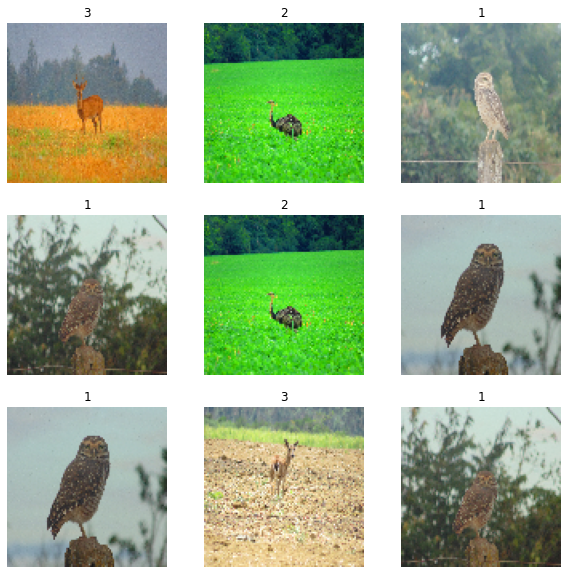

In [24]:
num = len(Y_train)
plt.figure(figsize=(10, 10)) #plotar as imagens size 10 x 10
for i in range(9):
  ax = plt.subplot(3, 3, i + 1) #plotar imagens em 3 colunas e 3 linhas
  kk = int(random.randrange(num))
  RGB_img = cv2.cvtColor(X_train[kk], cv2.COLOR_BGR2RGB) #converter imagens BGR em RGB 
  plt.imshow(RGB_img) #plotar imagens
  plt.title(Y_train[kk]) #plotar imagens
# O comando plt.title indica que títulos
  plt.axis("off") #sem legenda

In [25]:
num #retorna quantidade de arquivos existentes

24

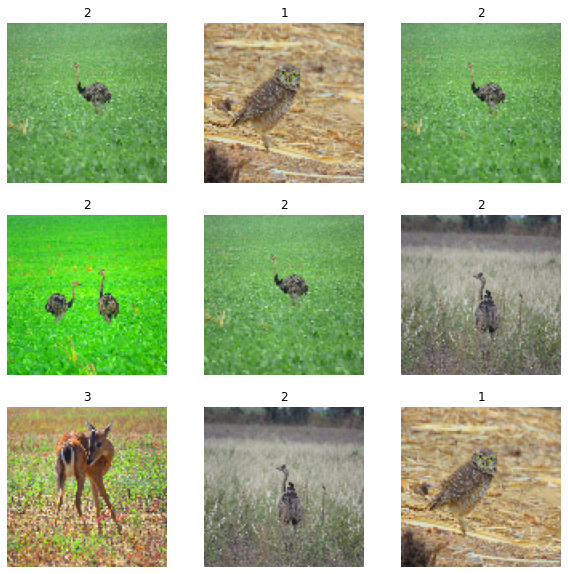

In [26]:
num = len(Y_test)
plt.figure(figsize=(10, 10)) #plotar imagens size 10 x 10
for i in range(9): 
  ax = plt.subplot(3, 3, i + 1) #plotar imagens em 3 colunas e 3 linhas
  kk = int(random.randrange(num)) #retornar incrementos específicos de números aleatórios
  RGB_img = cv2.cvtColor(X_test[kk], cv2.COLOR_BGR2RGB) #converter imagens BGR em RGB
  plt.imshow(RGB_img) #plotar imagens
  plt.title(Y_test[kk]) #plotar títulos
  plt.axis("off") #sem legenda

In [27]:
X_new = []

for XX in X_train:
  X_new.append(XX)
print(XX)
X_train = X_new.copy()

X_new = []
for XX in X_test:
  X_new.append(XX)
X_test = X_new.copy()

[[[184 182 168]
  [184 182 171]
  [185 181 171]
  ...
  [195 197 175]
  [196 198 176]
  [201 203 181]]

 [[185 180 165]
  [183 182 168]
  [188 185 171]
  ...
  [200 197 176]
  [195 196 176]
  [201 203 182]]

 [[187 181 168]
  [184 183 169]
  [184 184 169]
  ...
  [198 198 174]
  [194 197 176]
  [194 193 169]]

 ...

 [[153 146 133]
  [150 146 135]
  [148 142 131]
  ...
  [124 130 125]
  [139 141 141]
  [139 144 135]]

 [[158 149 140]
  [152 146 135]
  [152 150 139]
  ...
  [123 129 124]
  [130 139 129]
  [130 134 129]]

 [[168 161 152]
  [158 154 143]
  [154 152 141]
  ...
  [100 117 103]
  [105 119 115]
  [113 123 117]]]


In [28]:
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K)) #matriz N x K de zeros
  I[np.arange(N), Y] = 1 #Retorna valores uniformemente espaçados
  return I

In [29]:
X_train = np.array(X_train)
Y_train = np.array(Y_train) 
K = len(set(Y_train))
X_train = X_train /255.0 #divisão por 255 é para evitar a saturação (cores são preenchimentos de 0 a 255)
Y_train = Y_train.astype(np.int32) #garantir dados fiquem escalonados
Y_train = ynindicator(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test = X_test /255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

IndexError: ignored

In [ ]:
model = Sequential() #modelo sequencia simples de camadas / construída uma CNN (Convolutional neural network)
model.add(Conv2D(input_shape=(Fauna_Size, Fauna_Size, 3), filters=32, kernel_size=(3, 3))) #imagens coloridas, 32 filtros, kernel_size definido
model.add(BatchNormalization()) #normalização
model.add(Activation('tanh')) #função de ativação: tangente hiperbólica
model.add(MaxPooling2D()) #redução do tamanho da foto

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(MaxPooling2D())

model.add(Flatten()) #redução para 1 dimensão
model.add(Dense(units=200)) #função de ativação em conjunto com os dados de entrada e pesos (200 unidades)
model.add(Activation('tanh'))
model.add(Dropout(0.3)) #prevenção de sobre-ajustamento de dados
model.add(Dense(units=100)) #função de ativação em conjunto com os dados de entrada e pesos (100 unidades)
model.add(Activation('tanh'))
model.add(Dense(units=K))
model.add(Activation('softmax'))  #forma multidimensional generalizada da função logística (ativação)

model.compile( #compilação dos dados
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
r = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=2, batch_size=16)
print("Returned:", r)

In [ ]:
# Plotagem dos gráficos para verificação de convergência - acurácia
plt.plot(r.history['accuracy'], label='acurácia')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [ ]:
# Plotagem dos gráficos para verificação de convergência - perdas
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()